In [1]:
import os
import numpy as np
from natsort import natsorted
import matplotlib.pyplot as plt
import re
import pandas as pd
from scipy import signal

In [2]:
# 153 884    измеряемый диапазон. 0-2136 диапазон данных
start = 400  # нм
end = 700  # нм
step = (884 - 153) / 2134


def nm_to_x(nm):
    return round((nm - start) / step)


# номера точек в массиве по координате х
start_point = round((start - 153) / step)
end_point = start_point + int((end - start) / step)
lamp_point = nm_to_x(565)
mean_point = nm_to_x(650)
min_point = nm_to_x(420)

x = np.arange(start + step, end, step)

In [3]:
def get_rmr(spec):
    y = []
    spec = re.split(",", spec)
    y = list(map(float, spec[start_point + 11 : end_point + 11]))
    return y


def get_txt(spec):
    y = []
    spec = re.split("\n|\t", spec)
    for j in range(start_point, end_point):
        y.append(spec[j * 2 + 15].replace(",", "."))
    return y


def get_csv(spec):
    y = []
    spec = re.split("\n|,", spec)
    for j in range(start_point, end_point):
        y.append(spec[j * 2 + 1].replace(",", "."))
    return y

In [4]:
def get_data(path):
    """получение всей папки в виде списка с массивами np"""
    _file_list = np.array(natsorted(os.listdir(path)))
    _data = []
    for file in range(len(_file_list)):
        with open(path + _file_list[file], "r", encoding="utf8") as spec:
            spec = spec.read()
        spec = re.split(",", spec)
        _data.append(np.array(spec[start_point + 11 : end_point + 11], dtype=float))
    #    _data.append(get_rmr(spec))
    return _data

In [15]:
# получение всех спектров в виде списка в котором
# каждая строка - папка, а каждый элемент - массив np с спектром
data_row = []   #изанчальные графики
data=[]         #сглаженные графики

main_folder = r"C:\Users\Nik\Desktop\prog\только rmr"
main_folder = main_folder.replace(chr(92), "/")
folders_list = np.array(natsorted(os.listdir(main_folder)))
print(main_folder)
print(folders_list)

for i in range(len(folders_list)):
    data_row.append(get_data(main_folder + "/" + folders_list[i] + "/"))
    #print("data from " + str(folders_list[i]) + " recived")
print('получено '+str(len(data_row))+' папок')



C:/Users/Nik/Desktop/prog/только rmr
['15' '16' '17' '18' '19' '20' '25' '26' '27' '28' '29' '30' '31']
получено 13папок


In [19]:
for i in range(len(data_row)):
    d=[]
    for j in range(len(data_row[i])):
        d.append(signal.savgol_filter(data_row[i][j],60,3))
        #print(len(data_row[i][j]))
    data.append(d)
print(len(data))
print(len(data[0]))

13
368


In [7]:
# функции для получения данных
def dmax(mas: np.array):
    return np.max(mas)


def dmax_650(mas: np.array):
    return np.max(mas) - mas[mean_point]


def dmax_list(mas: list):
    _max = []
    for a in mas:
        _max.append(np.max(a))
    return _max


def dmax_650_list(mas: list):
    _max = []
    for i in range(len(mas)):
        _max.append(np.max(mas[i]) - mas[i][mean_point])
    return _max

Text(0.5, 1.0, 'синтез 15')

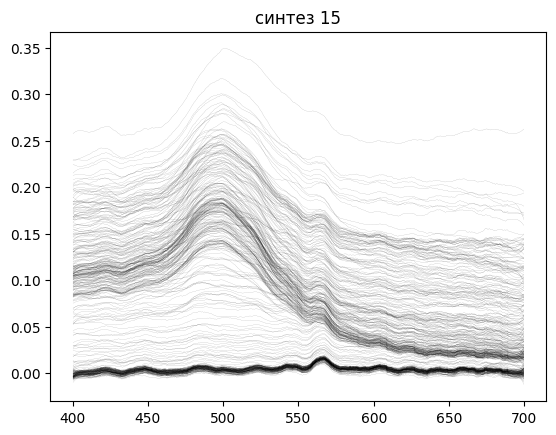

In [24]:
# просто посмотреть график в какойто папке
# ['15' '16' '17' '18' '19' '20' '25' '26' '27' '28' '29' '30' '31']
#  0    1    2    3    4    5    6    7    8    9    10   11   12

n = 0
for i in range(len(data[n])):
    plt.plot(x,data[n][i], lw=0.05, color="black")
plt.title('синтез '+str(folders_list[n]))

In [26]:
# график на таймлайне
# ['15' '16' '17' '18' '19' '20' '25' '26' '27' '28' '29' '30' '31']
#  0    1    2    3    4    5    6    7    8    9    10   11   12
print_grafs=False
for _folder in range(len(folders_list)):
    _mas = data[_folder][50:100]  # 100 cпектров из папки
    for i in range(len(_mas)):
        _mas[i] = signal.savgol_filter(_mas[i], 60, 3)

    # plt.subplots(figsize=[10, 10]);plt.clf()
    fig, axs = plt.subplots(3, 1, figsize=(10, 10))

    # fig.tit title("синтез " + str(folders_list[_folder]))
    fig.suptitle("синтез " + str(folders_list[_folder]))
    axs[0].set_ylabel("графики")
    _sp = 0
    for i in range(len(_mas)):
        axs[0].plot(np.arange(_sp, _sp + len(_mas[i])), _mas[i], lw=1)
        _sp += len(x)

    axs[1].set_ylabel("I(max)")
    minus = dmax_list(_mas)
    for i in range(len(_mas)):
        axs[1].scatter(i, minus[i])
    axs[1].plot(np.arange(len(minus)), minus, lw=0.2, color="black")

    axs[2].set_ylabel("I(max)-I(650)")
    minus = dmax_650_list(_mas)
    for i in range(len(_mas)):
        axs[2].scatter(i, minus[i])
    axs[2].plot(np.arange(len(minus)), minus, lw=0.2, color="black")
    if print_grafs==True: plt.savefig("timelane/" + str(folders_list[_folder]) + ".png")
    fig.clf();fig.clear()

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>